## Compare Results

A couple of these stars have existing $\nu\sin(i)$ measurements. Let's compare them to see if we find ourselves in the right ballpark.

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import astropy.units as u
import mystyle


sns.set_palette('colorblind')
import mystyle
plt.style.use(mystyle.ms)

In [2]:
ati = pd.read_csv('../../data/atium.csv',index_col=0)
#Exclude those stars with a Rhat > 1.1 flag and no results otherwise
ati = ati[np.isfinite(ati.nus.values)]
print(f'We have {len(ati)} stars with results')

We have 92 stars with results


In [3]:
lit = pd.DataFrame()
lit['KIC'] = ati.KIC.copy()

Read in [Campante et al. 2016](https://ui.adsabs.harvard.edu/abs/2016ApJ...819...85C/abstract) **seismic periods** and **spectroscopic vsini**

In [4]:
C16 = pd.read_csv('../../data/campante_2015.txt',sep='\s+')
lit = pd.merge(lit, C16, on='KIC', how='left')

Read in [LEGACY](https://ui.adsabs.harvard.edu/abs/2017ApJ...835..172L/abstract) **spectroscopic vsini** values

In [5]:
L17 = pd.read_csv('../../data/malatium.csv',usecols=['KIC','vsini']).rename(columns={'vsini':'L17_vsini'})
lit = pd.merge(lit, L17, on='KIC', how='left')

Add the [Davies et al. 2015](https://ui.adsabs.harvard.edu/abs/2015MNRAS.446.2959D/abstract) **asteroseismic vsini** 16 Cyg A & B data

16CygA = 12069424 |
16CygB = 12069449

In [6]:
lit['D16_vsini'] = np.nan
lit['D16_evsini'] = np.nan
lit['D16_P_rot'] = np.nan
lit['D16_u_eP_rot'] =np.nan
lit['D16_l_eP_rot'] =np.nan


lit.loc[lit.KIC == 12069424, 'D16_vsini'] = 2.23
lit.loc[lit.KIC == 12069424, 'D16_evsini'] = 0.07
lit.loc[lit.KIC == 12069424, 'D16_P_rot'] = 23.8
lit.loc[lit.KIC == 12069424, 'D16_u_eP_rot'] = 1.5
lit.loc[lit.KIC == 12069424, 'D16_l_eP_rot'] = 1.8

lit.loc[lit.KIC == 12069449, 'D16_vsini'] = 1.35
lit.loc[lit.KIC == 12069449, 'D16_evsini'] = 0.08
lit.loc[lit.KIC == 12069449, 'D16_P_rot'] = 23.2
lit.loc[lit.KIC == 12069449, 'D16_u_eP_rot'] = 11.5
lit.loc[lit.KIC == 12069449, 'D16_l_eP_rot'] = 3.2

Add the [Nielsen et al. 2015](https://ui.adsabs.harvard.edu/abs/2015A%26A...582A..10N/abstract) **seismic periods**

In [7]:
lit['N15_P_rot'] = np.nan
lit['N15_u_eP_rot'] =np.nan
lit['N15_l_eP_rot'] =np.nan

lit.loc[lit.KIC == 4914923, 'N15_P_rot'] = 17.98
lit.loc[lit.KIC == 4914923, 'N15_u_eP_rot'] = 3.17
lit.loc[lit.KIC == 4914923, 'N15_l_eP_rot'] = 2.27

lit.loc[lit.KIC == 5184732, 'N15_P_rot'] = 19.44
lit.loc[lit.KIC == 5184732, 'N15_u_eP_rot'] = 1.63
lit.loc[lit.KIC == 5184732, 'N15_l_eP_rot'] = 2.13

lit.loc[lit.KIC == 6116048, 'N15_P_rot'] = 17.61
lit.loc[lit.KIC == 6116048, 'N15_u_eP_rot'] = 0.95
lit.loc[lit.KIC == 6116048, 'N15_l_eP_rot'] = 1.31

lit.loc[lit.KIC == 6933899, 'N15_P_rot'] = 29.92
lit.loc[lit.KIC == 6933899, 'N15_u_eP_rot'] = 4.90
lit.loc[lit.KIC == 6933899, 'N15_l_eP_rot'] = 6.76

lit.loc[lit.KIC == 10963065, 'N15_P_rot'] = 12.01
lit.loc[lit.KIC == 10963065, 'N15_u_eP_rot'] = 1.42
lit.loc[lit.KIC == 10963065, 'N15_l_eP_rot'] = 1.09

Add the [Benomar et al. 2018](https://ui.adsabs.harvard.edu/abs/2018Sci...361.1231B/abstract) latitudinal rotation periods

We will use the $a1$ parameter, which in this case is equal to the global rotational splitting in absense of latitudinal differential rotation.

In [8]:
B18 = pd.read_csv('../../data/benomar_2018_rot.txt', sep='\s+')

In [9]:
B18['lowa1'] = B18['a1'] - B18['l_a1']
B18['upa1'] = B18['a1'] + B18['u_a1']

B18['B18_P_rot'] = (1./u.Quantity(B18['a1'].values, u.nanohertz).to(1/u.day)).value
B18['B18_l_eP_rot'] = (1./u.Quantity(B18['lowa1'].values, u.nanohertz).to(1/u.day)).value - B18['B18_P_rot']
B18['B18_u_eP_rot'] = B18['B18_P_rot'] - (1./u.Quantity(B18['upa1'].values, u.nanohertz).to(1/u.day)).value

In [10]:
lit = pd.merge(lit, B18[['KIC','B18_P_rot','B18_l_eP_rot','B18_u_eP_rot']], on='KIC', how='left')

## Plot Spectroscopic $v\sin(i)$

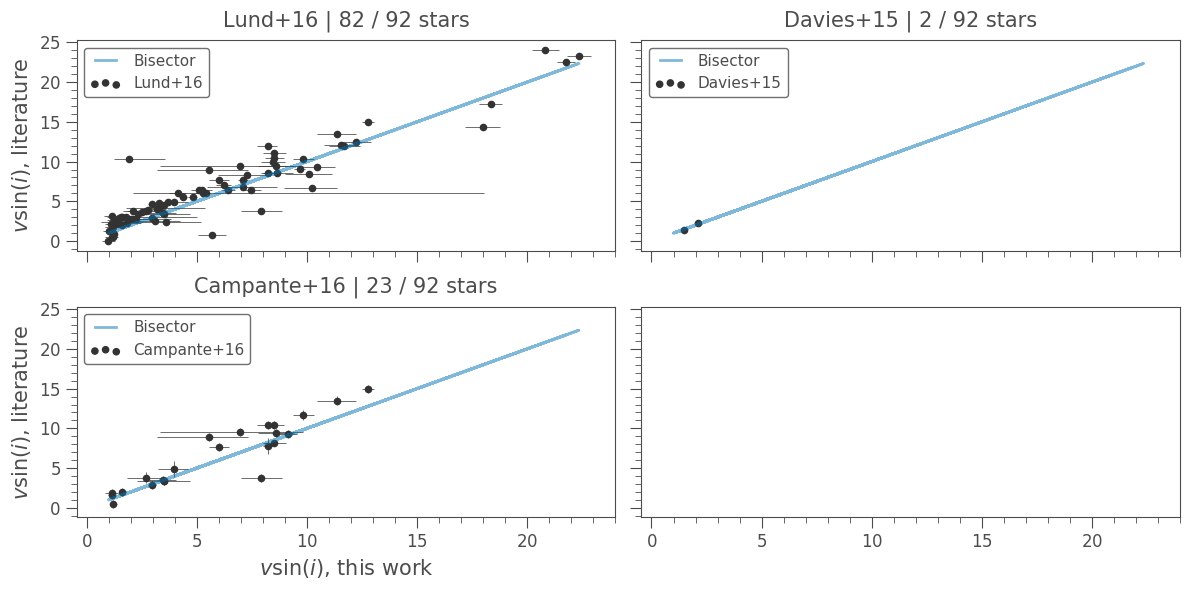

In [11]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(2,2,figsize=(12,6), sharex=True, sharey=True)
    axl = ax[0,0]
    c = axl.scatter(ati['vsini'], lit['L17_vsini'], lw=1, s=20, zorder=2, label='Lund+16')
    axl.errorbar(ati['vsini'], lit['L17_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']],
                fmt='|', zorder=1)
    axl.set_axisbelow(True)
    axl.set_ylabel(r'$v\sin(i)$, literature')
    axl.set_title(f'Lund+16 | {len(lit[np.isfinite(lit.L17_vsini)])} / {len(lit)} stars', fontsize=15)

    axc = ax[1,0]
    c = axc.scatter(ati['vsini'], lit['C15_vsini'], lw=1, s=20, zorder=2, label='Campante+16')
    axc.errorbar(ati['vsini'], lit['C15_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']], yerr=lit['C15_evsini'],
                fmt='|', zorder=1)
    axc.set_axisbelow(True)
    axc.set_xlabel(r'$v\sin(i)$, this work')
    axc.set_ylabel(r'$v\sin(i)$, literature')
    axc.set_title(f'Campante+16 | {len(lit[np.isfinite(lit.C15_vsini)])} / {len(lit)} stars', fontsize=15)    
    
    
    axd = ax[0,1]
    c = axd.scatter(ati['vsini'], lit['D16_vsini'], lw=1,s=20, zorder=2, label='Davies+15')
    axd.errorbar(ati['vsini'], lit['D16_vsini'], xerr=[ati['l_vsini'], ati['u_vsini']], yerr=lit['D16_evsini'],
                fmt='|', zorder=1)
    axd.set_axisbelow(True)
    axd.set_title(f'Davies+15 | {len(lit[np.isfinite(lit.D16_vsini)])} / {len(lit)} stars', fontsize=15)   


    axc.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    axd.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    axl.plot(ati['vsini'],ati['vsini'],lw=2, alpha=.5, label='Bisector')
    axc.legend()
    axd.legend()
    axl.legend()

    
    fig.tight_layout()
    plt.show()



## Plot Periods

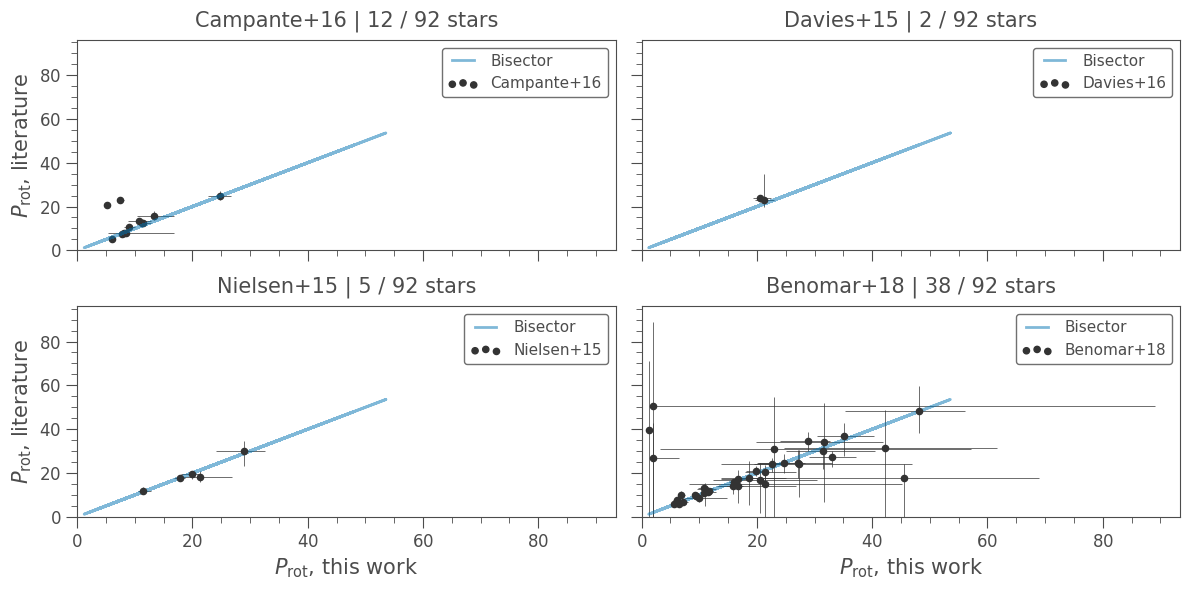

In [12]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(2,2,figsize=(12,6), sharex=True, sharey=True)
    axc = ax[0,0]
    c = axc.scatter(ati['P'], lit['C15_P_rot'], lw=1,s=20, zorder=2, label='Campante+16')
    axc.errorbar(ati['P'], lit['C15_P_rot'], xerr=[ati['l_P'], ati['u_P']], yerr=lit['C15_eP_rot'],
                fmt='|', zorder=1)
    axc.set_axisbelow(True)
    axc.set_ylabel(r'$P_{\rm rot}$, literature')
    axc.set_title(f'Campante+16 | {len(lit[np.isfinite(lit.C15_P_rot)])} / {len(lit)} stars', fontsize=15)

    axn = ax[1,0]
    c = axn.scatter(ati['P'], lit['N15_P_rot'], lw=1,s=20, zorder=3, label='Nielsen+15')
    axn.errorbar(ati['P'], lit['N15_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['N15_l_eP_rot'],lit['N15_u_eP_rot']],
                 fmt='|', zorder=1)     
    axn.set_axisbelow(True)
    axn.set_xlabel(r'$P_{\rm rot}$, this work')
    axn.set_ylabel(r'$P_{\rm rot}$, literature')
    axn.set_title(f'Nielsen+15 | {len(lit[np.isfinite(lit.N15_P_rot)])} / {len(lit)} stars', fontsize=15)    
    
    axd = ax[0,1]
    c = axd.scatter(ati['P'], lit['D16_P_rot'], lw=1,s=20, zorder=4, label='Davies+16')
    axd.errorbar(ati['P'], lit['D16_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['D16_l_eP_rot'],lit['D16_u_eP_rot']],
                 fmt='|', zorder=1)
    axd.set_title(f'Davies+15 | {len(lit[np.isfinite(lit.D16_P_rot)])} / {len(lit)} stars', fontsize=15)    
    

    axb = ax[1,1]
    c = axb.scatter(ati['P'], lit['B18_P_rot'], lw=1,s=20, zorder=5, label='Benomar+18')
    axb.errorbar(ati['P'], lit['B18_P_rot'], xerr=[ati['l_P'], ati['u_P']],
                 yerr=[lit['B18_l_eP_rot'],lit['B18_u_eP_rot']],
                 fmt='|', zorder=1)
    axb.set_title(f'Benomar+18 | {len(lit[np.isfinite(lit.B18_P_rot)])} / {len(lit)} stars', fontsize=15)    
    axb.set_xlabel(r'$P_{\rm rot}$, this work')
    

    axc.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    axd.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    axn.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')    
    axb.plot(ati['P'],ati['P'],lw=2, alpha=.5, label='Bisector')
    axc.legend()
    axd.legend()
    axb.legend()
    axn.legend()
    axc.set_xlim(0)
    axd.set_xlim(0)
    axb.set_xlim(0)
    axn.set_xlim(0)
    axc.set_ylim(0)
    axd.set_ylim(0)
    axb.set_ylim(0)
    axn.set_ylim(0)    
    
    fig.tight_layout()
    plt.show()



## Investigate inclinations

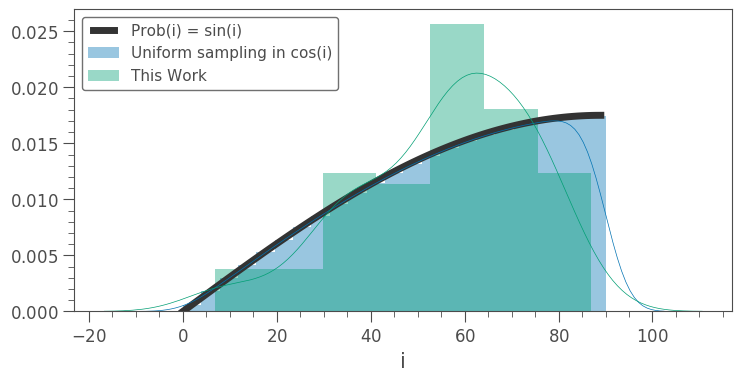

In [13]:
with plt.style.context(mystyle.ms):
    plt.plot(0.0175 * np.sin(np.linspace(0, np.pi/2., 90)), lw=5, label='Prob(i) = sin(i)')
    sns.distplot(90*(np.arccos(np.linspace(0, 1, 5000))/(np.pi/2)), label='Uniform sampling in cos(i)')
    sns.distplot(90*ati.i/(np.pi/2), label='This Work')
    plt.legend()

## Comparison with unpublished LEGACY and Kages data

In [14]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

### Adding LEGACY and Kages data

In [15]:
col = pd.DataFrame()
col['KIC'] = ati.KIC.copy()
col['i'] = np.nan
col['u_i'] = np.nan
col['l_i'] = np.nan
col['nus'] = np.nan
col['l_nus'] = np.nan
col['u_nus'] = np.nan
col['nus*'] = np.nan
col['l_nus*'] = np.nan
col['u_nus*'] = np.nan
col['P'] = np.nan
col['l_P'] = np.nan
col['u_P'] = np.nan
col['label'] = ''

Inclination, 0,1. Splitting, 2,3. Projected Splitting, 4, 5.

In [16]:
for idx in ati.index:
    kic = str(ati.loc[idx].KIC)

    try:
        files = glob.glob(f'../../data/kages_rotation/{kic}/Victor/rotation.txt')
        vals = pd.read_csv(files[0], index_col=None, sep='\s+')
        col.loc[col.KIC == int(kic), 'i'] =  vals['nusini_errm'].values
        col.loc[col.KIC == int(kic), 'u_i'] =  vals['angle'].values
        col.loc[col.KIC == int(kic), 'l_i'] =  vals['angle_errp'].values
  
        theta = vals['#'].values
        utheta = vals['nusini'].values
        ltheta = vals['nusini_errp'].values
        col.loc[col.KIC == int(kic), 'nus*'] = theta
        col.loc[col.KIC == int(kic), 'u_nus*'] = utheta
        col.loc[col.KIC == int(kic), 'l_nus*'] = ltheta

        i = np.deg2rad(vals['nusini_errm'].values)
        col.loc[col.KIC == int(kic), 'nus'] =  theta / np.sin(i)
        col.loc[col.KIC == int(kic), 'u_nus'] = np.sqrt((theta*np.cos(i)*vals['angle'].values)**2 + (utheta/np.sin(i))**2)
        col.loc[col.KIC == int(kic), 'l_nus'] =  np.sqrt((theta*np.cos(i)*vals['angle_errp'].values)**2 + (ltheta/np.sin(i))**2)
        
        col.loc[col.KIC == int(kic), 'P'] = vals['angle_errm'].values
        col.loc[col.KIC == int(kic), 'u_P'] =   vals['period'].values
        col.loc[col.KIC == int(kic), 'l_P'] =   vals['period_errp'].values
        
        col.loc[col.KIC == int(kic), 'label'] = 'K'
        
    except IndexError:
        try:
            files = glob.glob(f'../../data/legacy_rotation/inc_split/{kic}*.txt')
            chains = np.genfromtxt(files[0]).T

            c = np.cumsum(chains[1])
            c /= c.max()
            md = chains[0][find_nearest_idx(c, 0.5)]
            lo = chains[0][find_nearest_idx(c, 0.159)]
            up = chains[0][find_nearest_idx(c, 0.841)]    
            col.loc[col.KIC == int(kic), 'i'] = md
            col.loc[col.KIC == int(kic), 'u_i'] = up-md
            col.loc[col.KIC == int(kic), 'l_i'] = md-lo

            c = np.cumsum(chains[3])
            c /= c.max()
            md = chains[2][find_nearest_idx(c, 0.5)]
            lo = chains[2][find_nearest_idx(c, 0.159)]
            up = chains[2][find_nearest_idx(c, 0.841)]    
            col.loc[col.KIC == int(kic), 'nus'] =  md
            col.loc[col.KIC == int(kic), 'l_nus'] =  up-md
            col.loc[col.KIC == int(kic), 'u_nus'] =  md-lo
            
            c = np.cumsum(chains[5])
            c /= c.max()
            md = chains[4][find_nearest_idx(c, 0.5)]
            lo = chains[4][find_nearest_idx(c, 0.159)]
            up = chains[4][find_nearest_idx(c, 0.841)]    
            col.loc[col.KIC == int(kic), 'nus*'] =  md
            col.loc[col.KIC == int(kic), 'l_nus*'] =  up-md
            col.loc[col.KIC == int(kic), 'u_nus*'] =  md-lo            

            ns = u.Quantity(md, u.microhertz).to(1./u.day).value
            uns = u.Quantity(up-md, u.microhertz).to(1./u.day).value
            lns = u.Quantity(md-lo, u.microhertz).to(1./u.day).value
            col.loc[col.KIC == int(kic), 'P'] = 1./ns
            col.loc[col.KIC == int(kic), 'u_P'] = uns/ns
            col.loc[col.KIC == int(kic), 'l_P'] =  lns/ns
        
            col.loc[col.KIC == int(kic), 'label'] = 'L'

        except IndexError:
            print('Star not included in LEGACY or Kages data (somehow..?)')
            continue

### Projected Splitting:

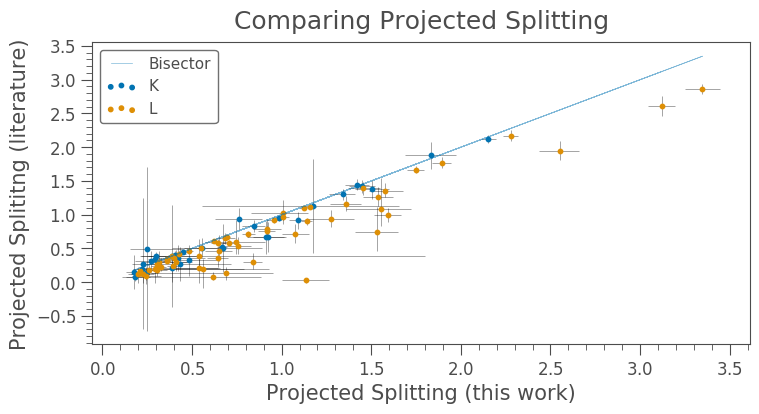

In [17]:
with plt.style.context(mystyle.ms):
    sns.set_palette('colorblind')
    fig, ax = plt.subplots()
    ax.scatter(ati['nus*'][col.label == 'K'], col['nus*'][col.label == 'K'], s=10, zorder = 2, label='K')
    ax.scatter(ati['nus*'][col.label == 'L'], col['nus*'][col.label == 'L'], s=10, zorder = 2, label='L')    
    ax.errorbar(ati['nus*'], col['nus*'], xerr=[ati['l_nus*'],ati['u_nus*']],
                 yerr=[col['l_nus*'], col['u_nus*']],
                 fmt='|', zorder=1, c='k', alpha=.5)
    ax.plot(ati['nus*'], ati['nus*'], label='Bisector', alpha=.5)
    ax.legend()
    ax.set_xlabel(r'Projected Splitting (this work)')
    ax.set_ylabel(r'Projected Splititng (literature)')
    ax.set_title('Comparing Projected Splitting')

On average I find slightly higher projected splitting, especially for the fastest rotators.

### Inclination:

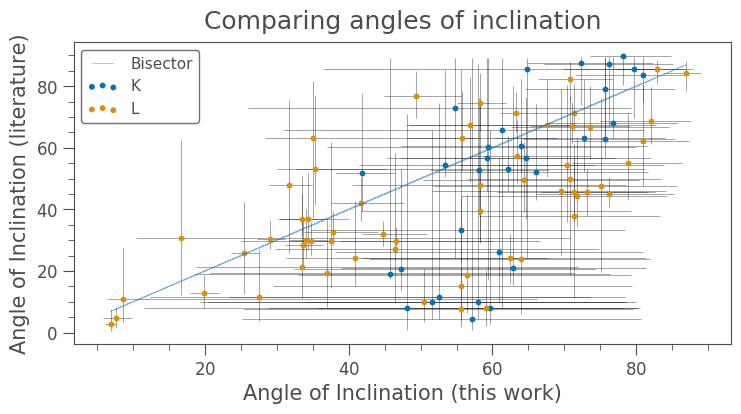

In [18]:
ai = np.rad2deg(ati.i.values)
ail = np.rad2deg(ati.l_i.values)
aiu = np.rad2deg(ati.u_i.values)
with plt.style.context(mystyle.ms):
    sns.set_palette('colorblind')
    fig, ax = plt.subplots()
    ax.scatter(ai[col.label == 'K'], col.i[col.label == 'K'], s=10, label='K', zorder=2)
    ax.scatter(ai[col.label == 'L'], col.i[col.label == 'L'], s=10, label='L', zorder=2)
    
    ax.errorbar(ai, col.i, xerr=[ail, aiu],
                 yerr=[col.l_i, col.u_i],
                 fmt='|', zorder=1, c='k', alpha=.5)
    ax.plot(ai, ai, label='Bisector', alpha=.5)
    ax.legend()
    ax.set_xlabel(r'Angle of Inclination (this work)')
    ax.set_ylabel(r'Angle of Inclination (literature)')
    ax.set_title('Comparing angles of inclination')

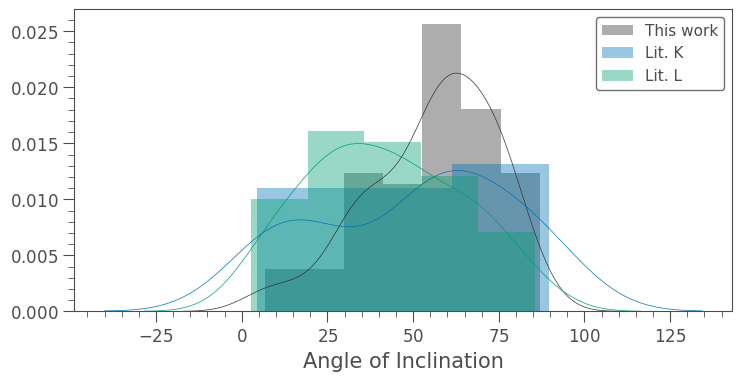

In [19]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots()
    sns.distplot(ai, label='This work')
    sns.distplot(col.loc[col.label == 'K', 'i'], label='Lit. K')
    sns.distplot(col.loc[col.label == 'L', 'i'], label='Lit. L')
#     sns.distplot(np.rad2deg(np.arccos(np.linspace(0, 1, 5000))), label='p(i) ~ sin(i)')
    ax.set_xlabel(r'Angle of Inclination')
    ax.legend()

It seems like mine match the expected distribution a little better, but it's hard to tell with such a low number of stars. It's also possible that I'm more prior-dominated because constraining the inclination is hard, and therefore finding higher values overall. Kamiaka+2018 says that for low SNR targets $i$ will be biased towards $\sim30\deg$. We see this both in our new $i$ and the LEGACY $i$ values.

### Splitting:

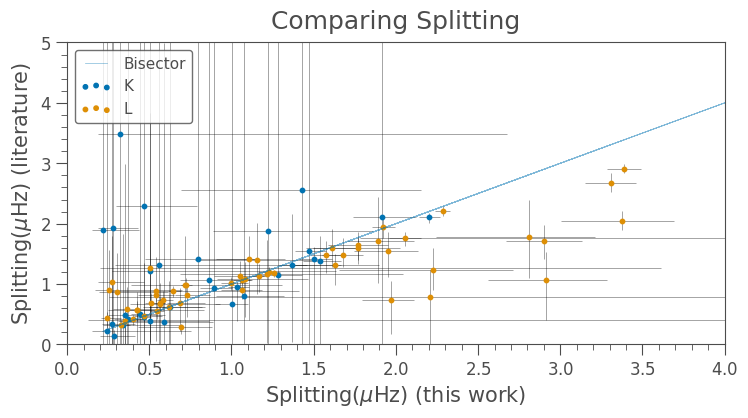

In [20]:
with plt.style.context(mystyle.ms):
    sns.set_palette('colorblind')
    fig, ax = plt.subplots()
    ax.scatter(ati.nus[col.label == 'K'], col.nus[col.label == 'K'], s=10, label='K', zorder=2)
    ax.scatter(ati.nus[col.label == 'L'], col.nus[col.label == 'L'], s=10, label='L', zorder=2)

    ax.errorbar(ati.nus, col.nus, xerr=[ati.l_nus, ati.u_nus],
                 yerr=[col.l_nus, col.u_nus],
                 fmt='|', zorder=1, c='k', alpha=.5)
    ax.plot(ati.nus, ati.nus, label='Bisector', alpha=.5)
    ax.legend()
    ax.set_xlabel(r'Splitting($\mu$Hz) (this work)')
    ax.set_ylabel(r'Splitting($\mu$Hz) (literature)')
    ax.set_title('Comparing Splitting')
    ax.set_xlim(0., 4.)
    ax.set_ylim(0., 5.)

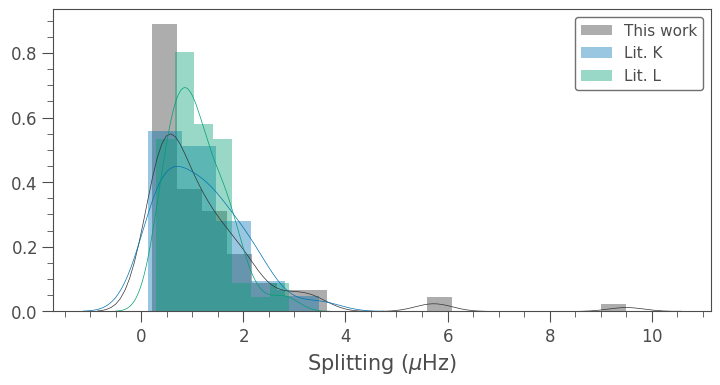

In [21]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots()
    sns.distplot(ati.nus, label='This work')
    sns.distplot(col.loc[col.label == 'K', 'nus'], label='Lit. K')
    sns.distplot(col.loc[col.label == 'L', 'nus'], label='Lit. L')
    ax.set_xlabel(r'Splitting ($\mu$Hz)')
    ax.legend()

Seem to find general agreement. I seem to find more fast rotators, but since $\nu_s = \frac{\nu_s\sin(i)}{\sin(i)}$, if $i++$ then $sin(i)++$, and therefore $\nu_s --$. Overally, I find slightly lower splittings, although I have more high-splitting outliers, which are likely correlated with my slightly higher-than-average projected splittings. All these stars seem to be in LEGACY too.

### Comparing periods:

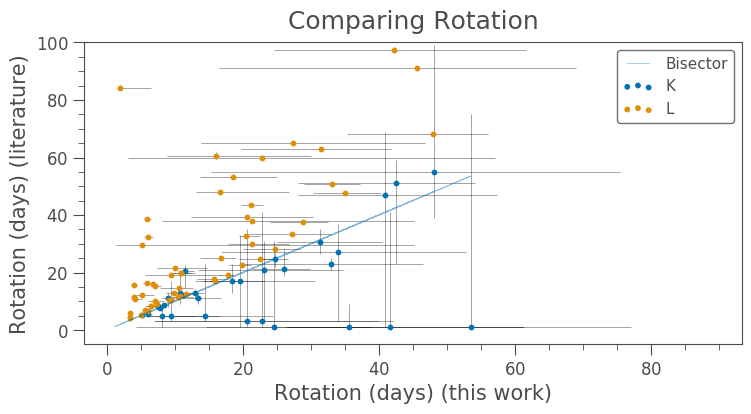

In [22]:
with plt.style.context(mystyle.ms):
    sns.set_palette('colorblind')
    fig, ax = plt.subplots()
    ax.scatter(ati.P[col.label == 'K'], col.P[col.label == 'K'], s=10, label='K', zorder=2)
    ax.scatter(ati.P[col.label == 'L'], col.P[col.label == 'L'], s=10, label='L', zorder=2)

    ax.errorbar(ati.P, col.P, xerr=[ati.l_P, ati.u_P],
                 yerr=[col.l_P, col.u_P],
                 fmt='|', zorder=1, c='k', alpha=.5)
    ax.plot(ati.P, ati.P, label='Bisector', alpha=.5)
    ax.legend()
    ax.set_ylim(-5, 100)
    ax.set_xlabel(r'Rotation (days) (this work)')
    ax.set_ylabel(r'Rotation (days) (literature)')
    ax.set_title('Comparing Rotation')


This is interesting, I seem to almost consistently find faster rotators than Kages and slower rotators than LEGACY. Why?